# Notebook for cleaning and preparing the raw data

In [1]:
# Import common libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Explore raw data provided

In [2]:
raw_df = pd.read_csv(r'..\data\raw_data\imports_main.csv')
raw_df.head()

,Importer,TEU,Month,Unlading_Port,Origin_Country,HS_Codes
0,Importer_00001,0.849421,1,4601,POLAND,990500
1,Importer_00002,1.000000,1,1401,ITALY,330590
2,Importer_00003,2.000000,1,5301,BELGIUM,730890
3,Importer_00004,0.035356,1,5301,GERMANY,580620
4,Importer_00005,4.000000,1,4601,DENMARK,392030


In [3]:
print(f'Dimensions\n-------------------\n{raw_df.shape}\n')
print(f'Data Types\n-------------------\n{raw_df.dtypes}\n')
print(f'Null values\n-------------------\n{raw_df.isnull().sum()}\n')
print(f'Unique values\n-------------------\n{raw_df.nunique()}\n')
print(f'Duplicate values\n-------------------\n{raw_df.duplicated().sum()}\n')

Dimensions
-------------------
(4158454, 6)

Data Types
-------------------
Importer           object
TEU               float64
Month               int64
Unlading_Port       int64
Origin_Country     object
HS_Codes            int64
dtype: object

Null values
-------------------
Importer          0
TEU               0
Month             0
Unlading_Port     0
Origin_Country    3
HS_Codes          0
dtype: int64

Unique values
-------------------
Importer          222221
TEU               409556
Month                 12
Unlading_Port         97
Origin_Country       225
HS_Codes           23898
dtype: int64

Duplicate values
-------------------
2197940



Notes:  
- Large amount of duplicate entries
- despite the int data types, only TEU is numeric (ratio), everything else is nominal (categorical)
- 3 entries do not have an origin country?

###  Let's check the Months

<Axes: ylabel='Month'>

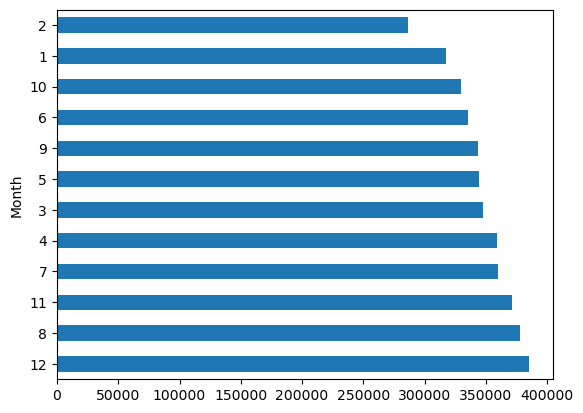

In [4]:
# Let's generate a barplot for the number of import entries per month to check if the months are balanced or imbalanced
raw_df['Month'].value_counts().plot.barh()

In [5]:
# Let's get the statistics of the months
raw_df['Month'].value_counts().describe()

count        12.000000
mean     346537.833333
std       27464.033382
min      286773.000000
25%      333901.250000
50%      345826.500000
75%      362624.250000
max      385519.000000
Name: count, dtype: float64

The Months are roughly balanced with a standard deviation of only 27k

###  Let's check the HS codes

In [6]:
# Let's check if there is a high cardinality in the HS codes
fraction = raw_df['HS_Codes'].value_counts()/len(raw_df)

# Print the fractional values
print(fraction.sort_values(ascending=False).head(10))

HS_Codes
401110    0.021902
940161    0.015003
950300    0.013055
940360    0.012621
392690    0.012181
690721    0.009577
870899    0.009283
220421    0.007808
870829    0.007418
940350    0.007179
Name: count, dtype: float64


In [7]:
# Let's get the summary statistics for the HS codes
raw_df['HS_Codes'].value_counts().describe()

count    23898.000000
mean       174.008453
std       1385.615106
min          1.000000
25%          1.000000
50%          2.000000
75%          8.000000
max      91077.000000
Name: count, dtype: float64

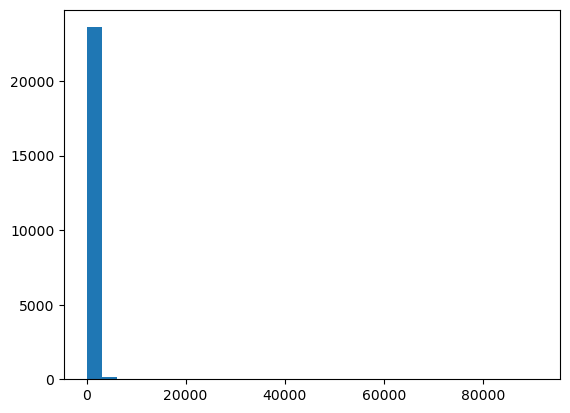

In [8]:
# Histogram
raw_df['HS_Codes'].value_counts().hist(bins=30)
plt.grid(False)

HS codes are highly skewed 
- standard deviation is greater than the mean
- median is way less than the mean implying left skewed

###  Let's check the Importers

In [9]:
# Let's do the same for importers
fraction = raw_df['Importer'].value_counts()/len(raw_df)

# Print the fractional values
print(fraction.sort_values(ascending=False).head(10))

Importer
Importer_00193    0.015150
Importer_00028    0.014470
Importer_00015    0.010935
Importer_00226    0.009974
Importer_00057    0.009561
Importer_00206    0.008459
Importer_00060    0.008240
Importer_00232    0.006092
Importer_00501    0.005850
Importer_00047    0.005078
Name: count, dtype: float64


In [10]:
# Let's get the summary statistics for the Importers
raw_df['Importer'].value_counts().describe()

count    222221.000000
mean         18.713146
std         334.146558
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max       63001.000000
Name: count, dtype: float64

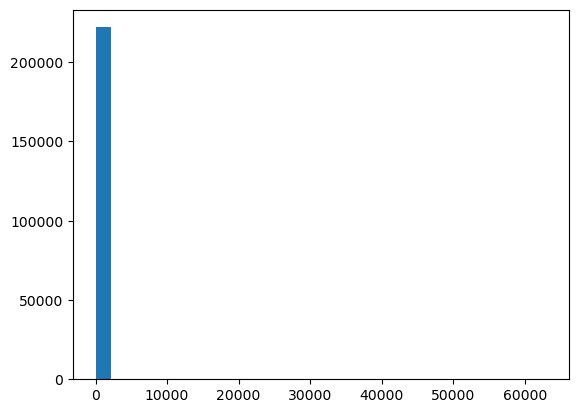

In [11]:
# Histogram
raw_df['Importer'].value_counts().hist(bins=30)
plt.grid(False)

Importers have the same story as HS codes

###  Let's check the Countries

Origin_Country
CHINA               0.192079
GERMANY             0.107880
VIETNAM             0.066551
TAIWAN              0.052448
INDIA               0.051088
HONG KONG S.A.R.    0.040082
ITALY               0.039306
TURKEY              0.030842
JAPAN               0.030533
THAILAND            0.025604
Name: count, dtype: float64


<Axes: ylabel='Origin_Country'>

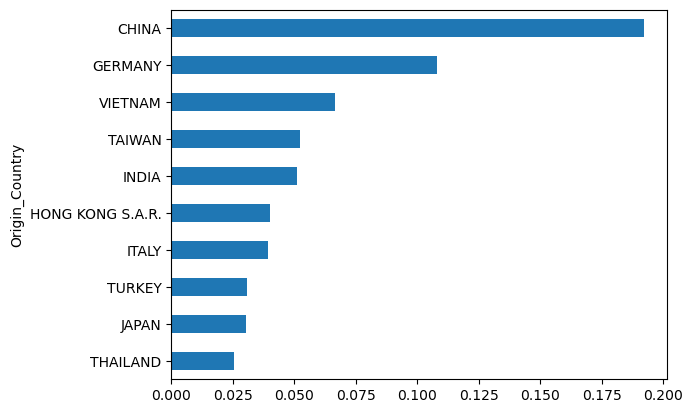

In [12]:
# Let's do the same for Origin country
fraction = raw_df['Origin_Country'].value_counts()/len(raw_df)

# Print the fractional values
print(fraction.sort_values(ascending=False).head(10))

# Plot the top 10 in descending order
fraction[:10].sort_values(ascending=True).plot.barh()

In [13]:
# Let's get the summary statistics for the Origin Country
raw_df['Origin_Country'].value_counts().describe()

count       225.000000
mean      18482.004444
std       70110.372120
min           1.000000
25%          31.000000
50%         260.000000
75%        5920.000000
max      798750.000000
Name: count, dtype: float64

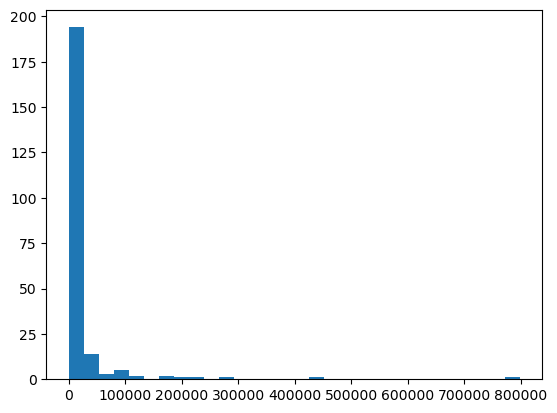

In [14]:
# Histogram
raw_df['Origin_Country'].value_counts().hist(bins=30)
plt.grid(False)